# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import folium
import os

import warnings
warnings.filterwarnings('ignore')

# Tornadoes per State

During the data cleaning process, I explored tornado occurences per state to determine where I wanted to focus my analysis. To get a better visualization of this process, let's visualize the frequency of tornados in each state in 2020.

In [2]:
# import the 2020 tornado data
tornado_2020 = pd.read_csv('/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/tornado_2020.csv')

In [3]:
# create lists of states and their corresponding tornado counts for 2020
state_list = tornado_2020['STATE_ABBR'].value_counts().index.tolist()
freq_list = tornado_2020['STATE_ABBR'].value_counts().tolist()

In [4]:
# create a dictionary from the 2 lists
state_freq = {}
for i in range(len(state_list)):
    state_freq[state_list[i]] = freq_list[i]
state_freq

{'MS': 96,
 'TX': 86,
 'AL': 78,
 'IL': 65,
 'GA': 64,
 'MN': 64,
 'SC': 54,
 'FL': 52,
 'LA': 49,
 'NC': 44,
 'AR': 42,
 'TN': 39,
 'OK': 39,
 'CO': 34,
 'IA': 31,
 'KY': 25,
 'SD': 23,
 'OH': 23,
 'ND': 22,
 'MO': 20,
 'WI': 20,
 'NE': 19,
 'KS': 17,
 'MD': 17,
 'IN': 14,
 'VA': 12,
 'NY': 10,
 'PA': 7,
 'CT': 6,
 'NM': 5,
 'CA': 4,
 'NJ': 4,
 'WY': 4,
 'DE': 4,
 'MI': 3,
 'MT': 3,
 'NH': 2,
 'MA': 2,
 'AZ': 2,
 'ME': 1,
 'WA': 1}

In [5]:
# load the shape of the zone (US states)
state_geo = os.path.join('/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/', 'us-states.json')
 
# initialize the map:
m = folium.Map(location=[37, -102], zoom_start=4)
 
# customize the chloropleth map features:
m.choropleth(
 geo_data = state_geo,
 name = 'choropleth',
 data = state_freq,
 columns = ['State', 'Tornado Count'],
 key_on = 'feature.id',
 fill_color = 'YlGn',
 nan_fill_color = 'white',
 bins = 9,
 fill_opacity = 0.7,
 line_opacity = 0.2,
 legend_name = 'Number of Tornadoes 2020',
 highlight = True
)
folium.LayerControl().add_to(m)

m

This visualization gives a nice idea of how many tornadoes occured during the first 8 months of 2020. It is interesting to see that the region of the country known as 'tornado alley' (including Oklahoma, Kansas, Nebraska, and the Dakotas) had fewer tornadoes than most of the southeastern states. Obviously this is just a quick snapshot, and a better historical visualization would look at a much larger timeframe. However, the above visualization does provide the best look at modern tornado occurrences, and being that severe weather events have ramped up as a result of climate change, the most recent data could provide the most valuable insights as to the predictability of these storms. 

In [6]:
# Save map to html
m.save('/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/tornado_by_state_USA.html')

# Removing Unnecesary Columns

In [7]:
# import the merged dataframe from the Data Wrangling process
tornado_data = pd.read_csv('/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/tornado_final.csv')

In [8]:
tornado_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110322 entries, 0 to 110321
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   STATION             110322 non-null  int64  
 1   NAME                110322 non-null  object 
 2   LATITUDE            110322 non-null  float64
 3   LONGITUDE           110322 non-null  float64
 4   ELEVATION           110322 non-null  float64
 5   DATE                110322 non-null  object 
 6   DEWP                101802 non-null  float64
 7   GUST                57649 non-null   float64
 8   MAX                 110283 non-null  float64
 9   MIN                 110303 non-null  float64
 10  MXSPD               101515 non-null  float64
 11  PRCP                97714 non-null   float64
 12  SLP                 54463 non-null   float64
 13  STP                 81274 non-null   float64
 14  TEMP                110322 non-null  float64
 15  VISIB               98218 non-null

There are a lot of columns that are not needed for the analysis. By removing these columns, it will be easier to perform EDA and subsequent modeling

In [9]:
# drop narrative columns, as well as the absolute row number column
drop_cols = ['EVENT_NARRATIVE', 'EPISODE_NARRATIVE', 'ABSOLUTE_ROWNUMBER']
tornado_data.drop(drop_cols, axis=1, inplace=True)

Some columns are reference ID's which are type float64, but should be converted to strings

In [10]:
# convert ID columns to strings
tornado_data['EVENT_ID'] = tornado_data['EVENT_ID'].astype(str)
tornado_data['EPISODE_ID'] = tornado_data['EPISODE_ID'].astype(str)
tornado_data['CZ_FIPS'] = tornado_data['CZ_FIPS'].astype(str)
tornado_data['STATION'] = tornado_data['STATION'].astype(str)

# convert string nan values to type np.nan
tornado_data = tornado_data.replace('nan', np.nan)

There are a lot of begin/end columns, like Range, Lat, Lon, Azimuth, and Location. These are all quite redundant and perhaps just one set of these columns would be sufficient for potential reference later on. 

In [11]:
# explore the begin/end columns
cols = ['BEGIN_LAT', 'END_LAT', 'BEGIN_LON', 'END_LON', 'BEGIN_RANGE', 'END_RANGE', \
        'BEGIN_LOCATION', 'END_LOCATION', 'BEGIN_AZIMUTH', 'END_AZIMUTH']
begin_end = tornado_data.filter(items=cols)
begin_end.dropna().head()

BEGIN_LAT  END_LAT  BEGIN_LON  END_LON  BEGIN_RANGE  END_RANGE  \
333     31.1100  31.1288   -90.8089 -90.7306          4.0        3.0   
458     31.3800  31.3816   -90.3554 -90.2440          2.0        2.0   
947     31.1834  31.1878   -90.2059 -90.2036          2.0        3.0   
1070    31.0100  31.1100   -90.1800 -89.9300          1.0        6.0   
1071    31.1112  31.1348   -89.9252 -89.8859          5.0        2.0   

     BEGIN_LOCATION  END_LOCATION BEGIN_AZIMUTH END_AZIMUTH  
333       BEECHWOOD        PEORIA           ESE           W  
458            RUTH  BRISTERVILLE             W           E  
947            MESA          MESA             N           N  
1070        SIMONDS       FLOWERS             S         ENE  
1071       PICKWICK      PICKWICK           WSW           W

In [12]:
# see if there are any interesting outlier for begin location
tornado_data.BEGIN_LOCATION.value_counts()

WILLIAMSBURG    7
FEARNS SPGS     6
BAXTERVILLE     6
HAMLET          4
BERTICE         4
               ..
PUCKETT         1
THOMASTOWN      1
AGRICOLA        1
CENTERVILLE     1
W V JCT         1
Name: BEGIN_LOCATION, Length: 537, dtype: int64

Williamsburg has had 7 tornadoes in the last 10 years. Even still, this doesn't seem too unusual.

In [13]:
# look at all of the values for begin range
tornado_data.BEGIN_RANGE.value_counts()

2.0     208
1.0     181
3.0     117
4.0     105
5.0      54
0.0      33
6.0      20
7.0      15
9.0       7
8.0       7
12.0      3
10.0      2
39.0      1
13.0      1
16.0      1
59.0      1
Name: BEGIN_RANGE, dtype: int64

The Range columns are very interesting. According to the NOAA documentation, they represent 'The distance to the nearest tenth of a mile, to the location referenced below.' However, every datapoint here is measured to the nearest whole mile. The outlying values (like 59.0) are interesting, but being that these values are non-continuous, they aren't very helpful, especially considering the newly-created Distance to Station column is much more precise.

In [14]:
# look at begin azimuth column values
tornado_data.BEGIN_AZIMUTH.value_counts()

W      69
SSW    69
SW     56
WNW    53
WSW    53
N      51
S      50
SSE    47
NNW    46
SE     43
E      42
ENE    41
ESE    39
NW     36
NNE    33
NE     28
Name: BEGIN_AZIMUTH, dtype: int64

Again, these are categorical, and don't offer much toward future modeling. Thus, I think it would fair to drop each pair of Range, Location, and Azimuth columns for the above stated reasons. The begin/end lat/lon columns can remain as the primary reference for location.

In [15]:
# drop range, location, and azimuth columns
tornado_data.drop(['BEGIN_RANGE', 'END_RANGE', 'BEGIN_LOCATION', 'END_LOCATION', \
                   'BEGIN_AZIMUTH', 'END_AZIMUTH'], axis=1, inplace=True)

In [16]:
pd.set_option('display.max_columns', None)
tornado_data.head()

STATION                   NAME  LATITUDE  LONGITUDE  ELEVATION  \
0  72235893919  MCCOMB AIRPORT, MS US   31.1827   -90.4708      125.9   
1  72235893919  MCCOMB AIRPORT, MS US   31.1827   -90.4708      125.9   
2  72235893919  MCCOMB AIRPORT, MS US   31.1827   -90.4708      125.9   
3  72235893919  MCCOMB AIRPORT, MS US   31.1827   -90.4708      125.9   
4  72235893919  MCCOMB AIRPORT, MS US   31.1827   -90.4708      125.9   

         DATE  DEWP  GUST   MAX   MIN  MXSPD  PRCP     SLP   STP  TEMP  VISIB  \
0  2010-01-01  37.7  19.0  53.1  39.9   13.0  0.12  1024.1   8.8  45.8    8.4   
1  2010-01-02  27.0   NaN  48.9  30.0    7.0  0.08  1027.9  12.2  38.1    9.4   
2  2010-01-03  19.3   NaN  46.9  28.0    7.0  0.00  1025.6  10.0  35.8   10.0   
3  2010-01-04  20.2  20.0  39.9  28.9   15.0  0.00  1026.2  10.5  33.6   10.0   
4  2010-01-05  14.9  19.0  42.1  17.1   12.0  0.00  1029.4  13.6  28.9    9.4   

   WDSP EVENT_ID CZ_NAME_STR BEGIN_DATE  BEGIN_TIME EVENT_TYPE TOR_F_SCALE  \
0   8.5      NaN         NaN        NaN         NaN        NaN         NaN   
1   5.0      NaN         NaN        NaN         NaN        NaN         NaN   
2   4.4      NaN         NaN        NaN         NaN        NaN         NaN   
3   6.4      NaN         NaN        NaN         NaN        NaN         NaN   
4   5.4      NaN         NaN        NaN         NaN        NaN         NaN   

  STATE_ABBR CZ_TIMEZONE EPISODE_ID CZ_TYPE CZ_FIPS  WFO SOURCE  TOR_LENGTH  \
0        NaN         NaN        NaN     NaN     NaN  NaN    NaN         NaN   
1        NaN         NaN        NaN     NaN     NaN  NaN    NaN         NaN   
2        NaN         NaN        NaN     NaN     NaN  NaN    NaN         NaN   
3        NaN         NaN        NaN     NaN     NaN  NaN    NaN         NaN   
4        NaN         NaN        NaN     NaN     NaN  NaN    NaN         NaN   

   TOR_WIDTH END_DATE  END_TIME  BEGIN_LAT  BEGIN_LON  END_LAT  END_LON  \
0        NaN      NaN       NaN        NaN        NaN      NaN      NaN   
1        NaN      NaN       NaN        NaN        NaN      NaN      NaN   
2        NaN      NaN       NaN        NaN        NaN      NaN      NaN   
3        NaN      NaN       NaN        NaN        NaN      NaN      NaN   
4        NaN      NaN       NaN        NaN        NaN      NaN      NaN   

  DAY_BEFORE  DISTANCE_MILES  
0        NaN             NaN  
1        NaN             NaN  
2        NaN             NaN  
3        NaN             NaN  
4        NaN             NaN

In [17]:
# check shape of the revised dataframe
tornado_data.shape

(110322, 40)

# Removing Redundant Weather Attributes

Along with the above columns that provided little relevance to the scope of this project, there are also other weather attributes that may potentially be redundant. There are 3 different wind attributes and 2 pressure attributes, so it would be worth checking out their correlations.

In [18]:
tornado_data.head()

STATION                   NAME  LATITUDE  LONGITUDE  ELEVATION  \
0  72235893919  MCCOMB AIRPORT, MS US   31.1827   -90.4708      125.9   
1  72235893919  MCCOMB AIRPORT, MS US   31.1827   -90.4708      125.9   
2  72235893919  MCCOMB AIRPORT, MS US   31.1827   -90.4708      125.9   
3  72235893919  MCCOMB AIRPORT, MS US   31.1827   -90.4708      125.9   
4  72235893919  MCCOMB AIRPORT, MS US   31.1827   -90.4708      125.9   

         DATE  DEWP  GUST   MAX   MIN  MXSPD  PRCP     SLP   STP  TEMP  VISIB  \
0  2010-01-01  37.7  19.0  53.1  39.9   13.0  0.12  1024.1   8.8  45.8    8.4   
1  2010-01-02  27.0   NaN  48.9  30.0    7.0  0.08  1027.9  12.2  38.1    9.4   
2  2010-01-03  19.3   NaN  46.9  28.0    7.0  0.00  1025.6  10.0  35.8   10.0   
3  2010-01-04  20.2  20.0  39.9  28.9   15.0  0.00  1026.2  10.5  33.6   10.0   
4  2010-01-05  14.9  19.0  42.1  17.1   12.0  0.00  1029.4  13.6  28.9    9.4   

   WDSP EVENT_ID CZ_NAME_STR BEGIN_DATE  BEGIN_TIME EVENT_TYPE TOR_F_SCALE  \
0   8.5      NaN         NaN        NaN         NaN        NaN         NaN   
1   5.0      NaN         NaN        NaN         NaN        NaN         NaN   
2   4.4      NaN         NaN        NaN         NaN        NaN         NaN   
3   6.4      NaN         NaN        NaN         NaN        NaN         NaN   
4   5.4      NaN         NaN        NaN         NaN        NaN         NaN   

  STATE_ABBR CZ_TIMEZONE EPISODE_ID CZ_TYPE CZ_FIPS  WFO SOURCE  TOR_LENGTH  \
0        NaN         NaN        NaN     NaN     NaN  NaN    NaN         NaN   
1        NaN         NaN        NaN     NaN     NaN  NaN    NaN         NaN   
2        NaN         NaN        NaN     NaN     NaN  NaN    NaN         NaN   
3        NaN         NaN        NaN     NaN     NaN  NaN    NaN         NaN   
4        NaN         NaN        NaN     NaN     NaN  NaN    NaN         NaN   

   TOR_WIDTH END_DATE  END_TIME  BEGIN_LAT  BEGIN_LON  END_LAT  END_LON  \
0        NaN      NaN       NaN        NaN        NaN      NaN      NaN   
1        NaN      NaN       NaN        NaN        NaN      NaN      NaN   
2        NaN      NaN       NaN        NaN        NaN      NaN      NaN   
3        NaN      NaN       NaN        NaN        NaN      NaN      NaN   
4        NaN      NaN       NaN        NaN        NaN      NaN      NaN   

  DAY_BEFORE  DISTANCE_MILES  
0        NaN             NaN  
1        NaN             NaN  
2        NaN             NaN  
3        NaN             NaN  
4        NaN             NaN

There are 3 different windspeed attributes: GUST (maximum wind gust), WDSP (mean windspeed), and MXSPD (maximum sustained windspeed). In Data Wrangling, I found that GUST had almost half of its rows containing missing values, while the MXSPD and WDSP each had less than 1 percent missing. If these columns are correlated, the GUST attribute could be completely removed from the data to avoid working with all of the missing values.

In [19]:
# look at correlation between GUST and WDSP
gust = np.array(tornado_data['GUST'].tolist())
wdsp = np.array(tornado_data['WDSP'].tolist())
nas = np.logical_or(np.isnan(gust), np.isnan(wdsp))
stats.pointbiserialr(gust[~nas], wdsp[~nas])

PointbiserialrResult(correlation=0.533218125658836, pvalue=0.0)

In [20]:
# look at correlation between GUST and MAX
gust = np.array(tornado_data['GUST'].tolist())
mxspd = np.array(tornado_data['MXSPD'].tolist())
nas = np.logical_or(np.isnan(gust), np.isnan(mxspd))
stats.pointbiserialr(gust[~nas], mxspd[~nas])

PointbiserialrResult(correlation=0.8267980408977575, pvalue=0.0)

In [21]:
# look at correlation between MAX and WDSP
mxspd = np.array(tornado_data['MXSPD'].tolist())
wdsp = np.array(tornado_data['WDSP'].tolist())
nas = np.logical_or(np.isnan(mxspd), np.isnan(wdsp))
stats.pointbiserialr(mxspd[~nas], wdsp[~nas])

PointbiserialrResult(correlation=0.7479138568760995, pvalue=0.0)

None of these correlations are so high as to warrant dropping any at this point, but the correlations are worth noting and will be explored further later on.

The same analysis can be done to compare STP (mean station pressure) and SLP (mean sea level pressure).

In [22]:
# look at correlation between STP and SLP
stp = np.array(tornado_data['STP'].tolist())
slp = np.array(tornado_data['SLP'].tolist())
nas = np.logical_or(np.isnan(stp), np.isnan(slp))
stats.pointbiserialr(stp[~nas], slp[~nas])

PointbiserialrResult(correlation=0.6881677392511312, pvalue=0.0)

This correlation is just under .7, which is still a relatively strong correlation. This is a significant correlation, but again I am going to wait until the modeling phase to do any removal of rows.

In [23]:
# look at the number of missing values for each column of weather data
weather_data = tornado_data.iloc[:, : 18] 
for column in weather_data:
    num = len(tornado_data.loc[tornado_data[column].isna()])
    print(column, '- ', num)

STATION -  0
NAME -  0
LATITUDE -  0
LONGITUDE -  0
ELEVATION -  0
DATE -  0
DEWP -  8520
GUST -  52673
MAX -  39
MIN -  19
MXSPD -  8807
PRCP -  12608
SLP -  55859
STP -  29048
TEMP -  0
VISIB -  12104
WDSP -  8494
EVENT_ID -  109566


In [24]:
tornado_data.shape

(110322, 40)

# EDA

Before I can plot anything, I need to convert the target variable (whether or not a tornado occured) into a numeric value. Thus I will rename the EVENT_TYPE column to TORNADO, and I will replace values with 0's (no tornado) and 1's (tornado).

In [25]:
# rename column
tornado_data.rename(columns={'EVENT_TYPE': 'TORNADO'}, inplace=True)

In [26]:
# change column values 
tornado_data['TORNADO'].replace({'Tornado': 1, np.nan: 0}, inplace=True)

In [27]:
tornado_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110322 entries, 0 to 110321
Data columns (total 40 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   STATION         110322 non-null  object 
 1   NAME            110322 non-null  object 
 2   LATITUDE        110322 non-null  float64
 3   LONGITUDE       110322 non-null  float64
 4   ELEVATION       110322 non-null  float64
 5   DATE            110322 non-null  object 
 6   DEWP            101802 non-null  float64
 7   GUST            57649 non-null   float64
 8   MAX             110283 non-null  float64
 9   MIN             110303 non-null  float64
 10  MXSPD           101515 non-null  float64
 11  PRCP            97714 non-null   float64
 12  SLP             54463 non-null   float64
 13  STP             81274 non-null   float64
 14  TEMP            110322 non-null  float64
 15  VISIB           98218 non-null   float64
 16  WDSP            101828 non-null  float64
 17  EVENT_ID  

In [28]:
# calculate percent of tornado occurences among the data
tornado_events = tornado_data.loc[tornado_data['TORNADO'] == 1]
p_tor = len(tornado_events)/len(tornado_data)
p_tor

0.006852667645619187

In [29]:
# use tornado_events dataframe to get a sense of the missing values of weather data when tornado occurred.
tornado_yes = tornado_events.iloc[:, : 18]
for column in tornado_yes:
    num = len(tornado_yes.loc[tornado_yes[column].isna()])
    print(column, '- ', num)

STATION -  0
NAME -  0
LATITUDE -  0
LONGITUDE -  0
ELEVATION -  0
DATE -  0
DEWP -  103
GUST -  117
MAX -  0
MIN -  0
MXSPD -  104
PRCP -  156
SLP -  353
STP -  454
TEMP -  0
VISIB -  101
WDSP -  104
EVENT_ID -  0


Now let's create a new dataframe with no NaN values.

In [30]:
# drop rows where the select columns have missing data
tornado_nona = tornado_events[tornado_events['STP'].notna() & tornado_events['PRCP'].notna() \
                              & tornado_events['SLP'].notna() & tornado_events['GUST'].notna()]

In [31]:
# display each row along with the corresponding number of missing values
tornado_nona = tornado_nona.iloc[:, : 18]
for column in tornado_nona:
    num = len(tornado_nona.loc[tornado_nona[column].isna()])
    print(column, '- ', num)

STATION -  0
NAME -  0
LATITUDE -  0
LONGITUDE -  0
ELEVATION -  0
DATE -  0
DEWP -  0
GUST -  0
MAX -  0
MIN -  0
MXSPD -  0
PRCP -  0
SLP -  0
STP -  0
TEMP -  0
VISIB -  0
WDSP -  0
EVENT_ID -  0


In [32]:
tornado_nona.shape

(186, 18)

There are only 186 rows with no NaN values. This is only a fraction of the data we started with, but it might be the best we can do moving forward.

Let's return to the tornado_events data frame.

In [33]:
# look at tornado count by year
tornado_events['DATE'] = tornado_events['DATE'].astype('datetime64[ns]')
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
counts = []
for year in years: 
    count = len(tornado_events.loc[tornado_events['DATE'].dt.year == year])
    counts.append(count)
    print(year, ':', count)

2010 : 34
2011 : 102
2012 : 52
2013 : 33
2014 : 51
2015 : 53
2016 : 54
2017 : 80
2018 : 59
2019 : 140
2020 : 98


There seems to have been a lot of tornados in 2019 and 2020. This is an interesting observation given the tornado-by-state visualization above and the decision to look at the most recent data.

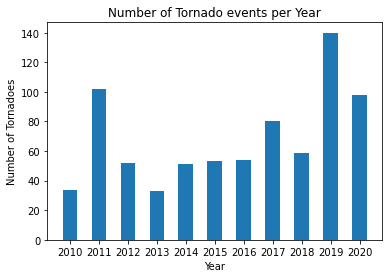

In [34]:
# visualize with a bar chart
labels = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

x = np.arange(len(labels))  # the label locations
width = 0.5

fig, ax = plt.subplots()
rects = ax.bar(x, counts, width)

# add titles and custom x-axis tick labels
ax.set_xlabel('Year')
ax.set_ylabel('Number of Tornadoes')
ax.set_title('Number of Tornado events per Year')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.show()

Note that this chart looks at the percentage of days for all reporting stations that a tornado occured. 2019 saw more than double the amount of tornados compared to 2018. We can do a similar breakdown by month.

In [35]:
# group tornado events by month
month = [0,0,0,0,0,0,0,0,0,0,0,0]
for s in tornado_events['DATE']:
    for i in range(12):
        if s.month == i+1:
            month[i] +=1
print(month)

[74, 73, 39, 327, 12, 19, 5, 21, 19, 21, 70, 76]


In [36]:
# create month column with values 1-12
tornado_data['DATE'] = tornado_data['DATE'].astype('datetime64[ns]')
month_col = []
for s in tornado_data['DATE']:
    for i in range(12):
        if s.month == i+1:
            month_col.append(i+1)
tornado_data['MONTH'] = month_col

In [37]:
tornado_data.head()

STATION                   NAME  LATITUDE  LONGITUDE  ELEVATION  \
0  72235893919  MCCOMB AIRPORT, MS US   31.1827   -90.4708      125.9   
1  72235893919  MCCOMB AIRPORT, MS US   31.1827   -90.4708      125.9   
2  72235893919  MCCOMB AIRPORT, MS US   31.1827   -90.4708      125.9   
3  72235893919  MCCOMB AIRPORT, MS US   31.1827   -90.4708      125.9   
4  72235893919  MCCOMB AIRPORT, MS US   31.1827   -90.4708      125.9   

        DATE  DEWP  GUST   MAX   MIN  MXSPD  PRCP     SLP   STP  TEMP  VISIB  \
0 2010-01-01  37.7  19.0  53.1  39.9   13.0  0.12  1024.1   8.8  45.8    8.4   
1 2010-01-02  27.0   NaN  48.9  30.0    7.0  0.08  1027.9  12.2  38.1    9.4   
2 2010-01-03  19.3   NaN  46.9  28.0    7.0  0.00  1025.6  10.0  35.8   10.0   
3 2010-01-04  20.2  20.0  39.9  28.9   15.0  0.00  1026.2  10.5  33.6   10.0   
4 2010-01-05  14.9  19.0  42.1  17.1   12.0  0.00  1029.4  13.6  28.9    9.4   

   WDSP EVENT_ID CZ_NAME_STR BEGIN_DATE  BEGIN_TIME  TORNADO TOR_F_SCALE  \
0   8.5      NaN         NaN        NaN         NaN        0         NaN   
1   5.0      NaN         NaN        NaN         NaN        0         NaN   
2   4.4      NaN         NaN        NaN         NaN        0         NaN   
3   6.4      NaN         NaN        NaN         NaN        0         NaN   
4   5.4      NaN         NaN        NaN         NaN        0         NaN   

  STATE_ABBR CZ_TIMEZONE EPISODE_ID CZ_TYPE CZ_FIPS  WFO SOURCE  TOR_LENGTH  \
0        NaN         NaN        NaN     NaN     NaN  NaN    NaN         NaN   
1        NaN         NaN        NaN     NaN     NaN  NaN    NaN         NaN   
2        NaN         NaN        NaN     NaN     NaN  NaN    NaN         NaN   
3        NaN         NaN        NaN     NaN     NaN  NaN    NaN         NaN   
4        NaN         NaN        NaN     NaN     NaN  NaN    NaN         NaN   

   TOR_WIDTH END_DATE  END_TIME  BEGIN_LAT  BEGIN_LON  END_LAT  END_LON  \
0        NaN      NaN       NaN        NaN        NaN      NaN      NaN   
1        NaN      NaN       NaN        NaN        NaN      NaN      NaN   
2        NaN      NaN       NaN        NaN        NaN      NaN      NaN   
3        NaN      NaN       NaN        NaN        NaN      NaN      NaN   
4        NaN      NaN       NaN        NaN        NaN      NaN      NaN   

  DAY_BEFORE  DISTANCE_MILES  MONTH  
0        NaN             NaN      1  
1        NaN             NaN      1  
2        NaN             NaN      1  
3        NaN             NaN      1  
4        NaN             NaN      1

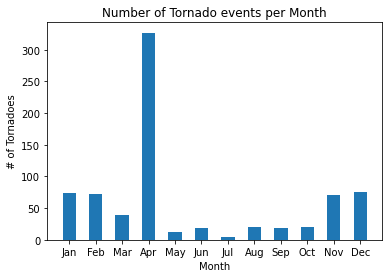

In [38]:
# plot a bar chart of the tornado events by season
bin_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
bins = month

x = np.arange(len(bin_labels))  # the label locations
width = 0.5

fig, ax = plt.subplots()
rects = ax.bar(x, bins, width, label='# Tornadoes')

# add titles and custom x-axis tick labels
ax.set_ylabel('# of Tornadoes')
ax.set_xlabel('Month')
ax.set_title('Number of Tornado events per Month')
ax.set_xticks(x)
ax.set_xticklabels(bin_labels)
plt.show()

The number of tornadoes that occur in the month of April alone is very significant. 327 of the 756 tornadoes occurred during this single month, which is over 43% of such storms. Let's double check to make sure that April isn't an outlier in terms of weather data reported.

In [39]:
# check to make sure there isn't too much of a discrepency in number of rows per month
tornado_data['MONTH'].value_counts()

5     9465
7     9396
3     9390
4     9336
10    9302
12    9301
8     9266
1     9224
6     9162
9     9022
11    9001
2     8457
Name: MONTH, dtype: int64

April is just like any other month. These findings are significant. It would be a good idea to create columns for each individual month using get_dummies

In [40]:
# use get_dummies to include unique month attributes in dataframe
tornado_data = pd.get_dummies(tornado_data, columns=['MONTH'])

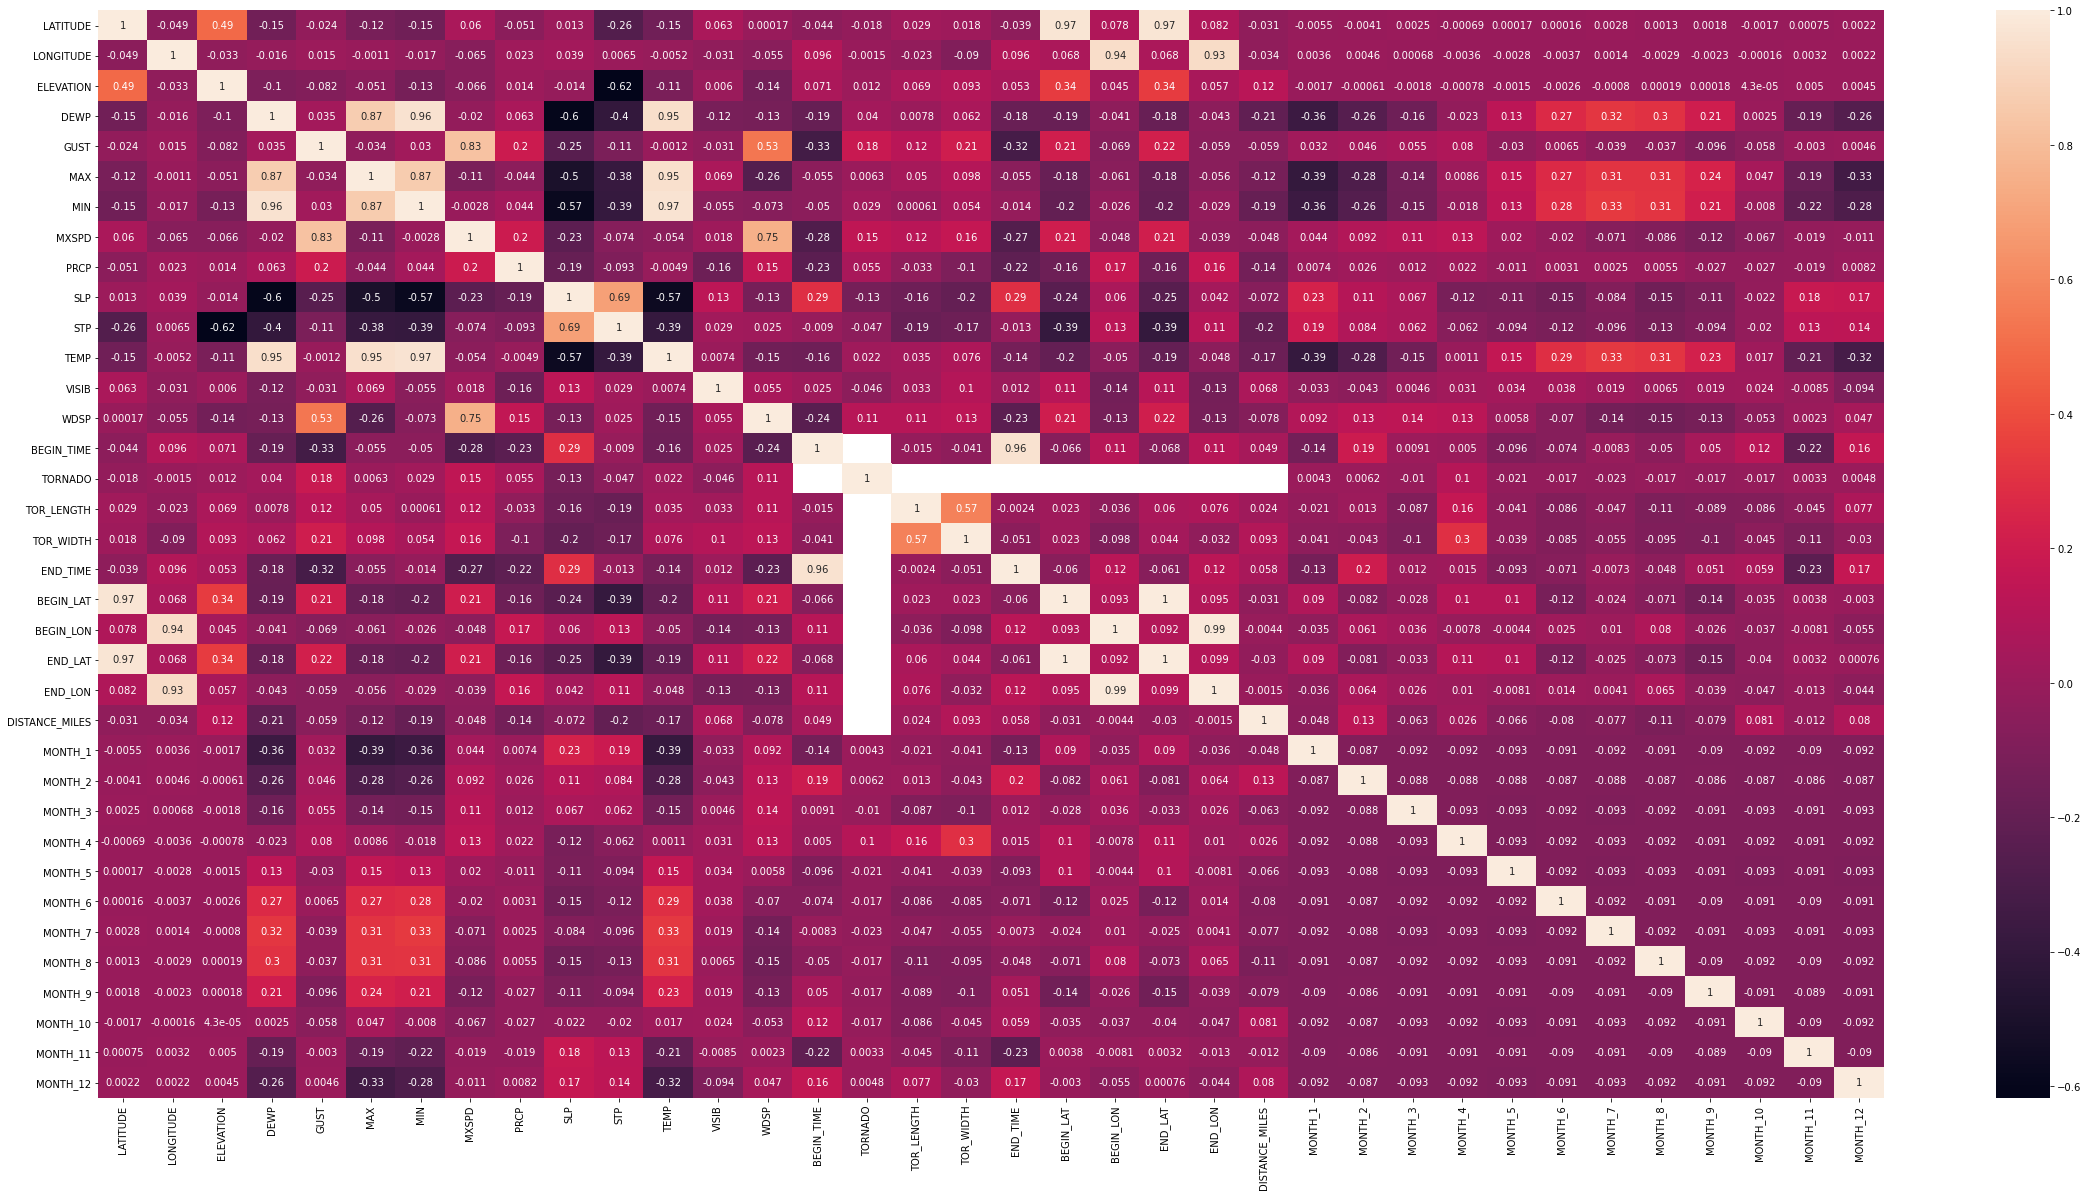

In [41]:
# plot heatmap of all attributes
plt.figure(figsize=(40,20))
sns.heatmap(tornado_data.corr(), annot=True)
plt.show()

In [42]:
# now choose only the weather attributes
arr = [6,7,8,9,10,11,12,13,14,15,16,21]
weather_data = tornado_data.iloc[:,arr]

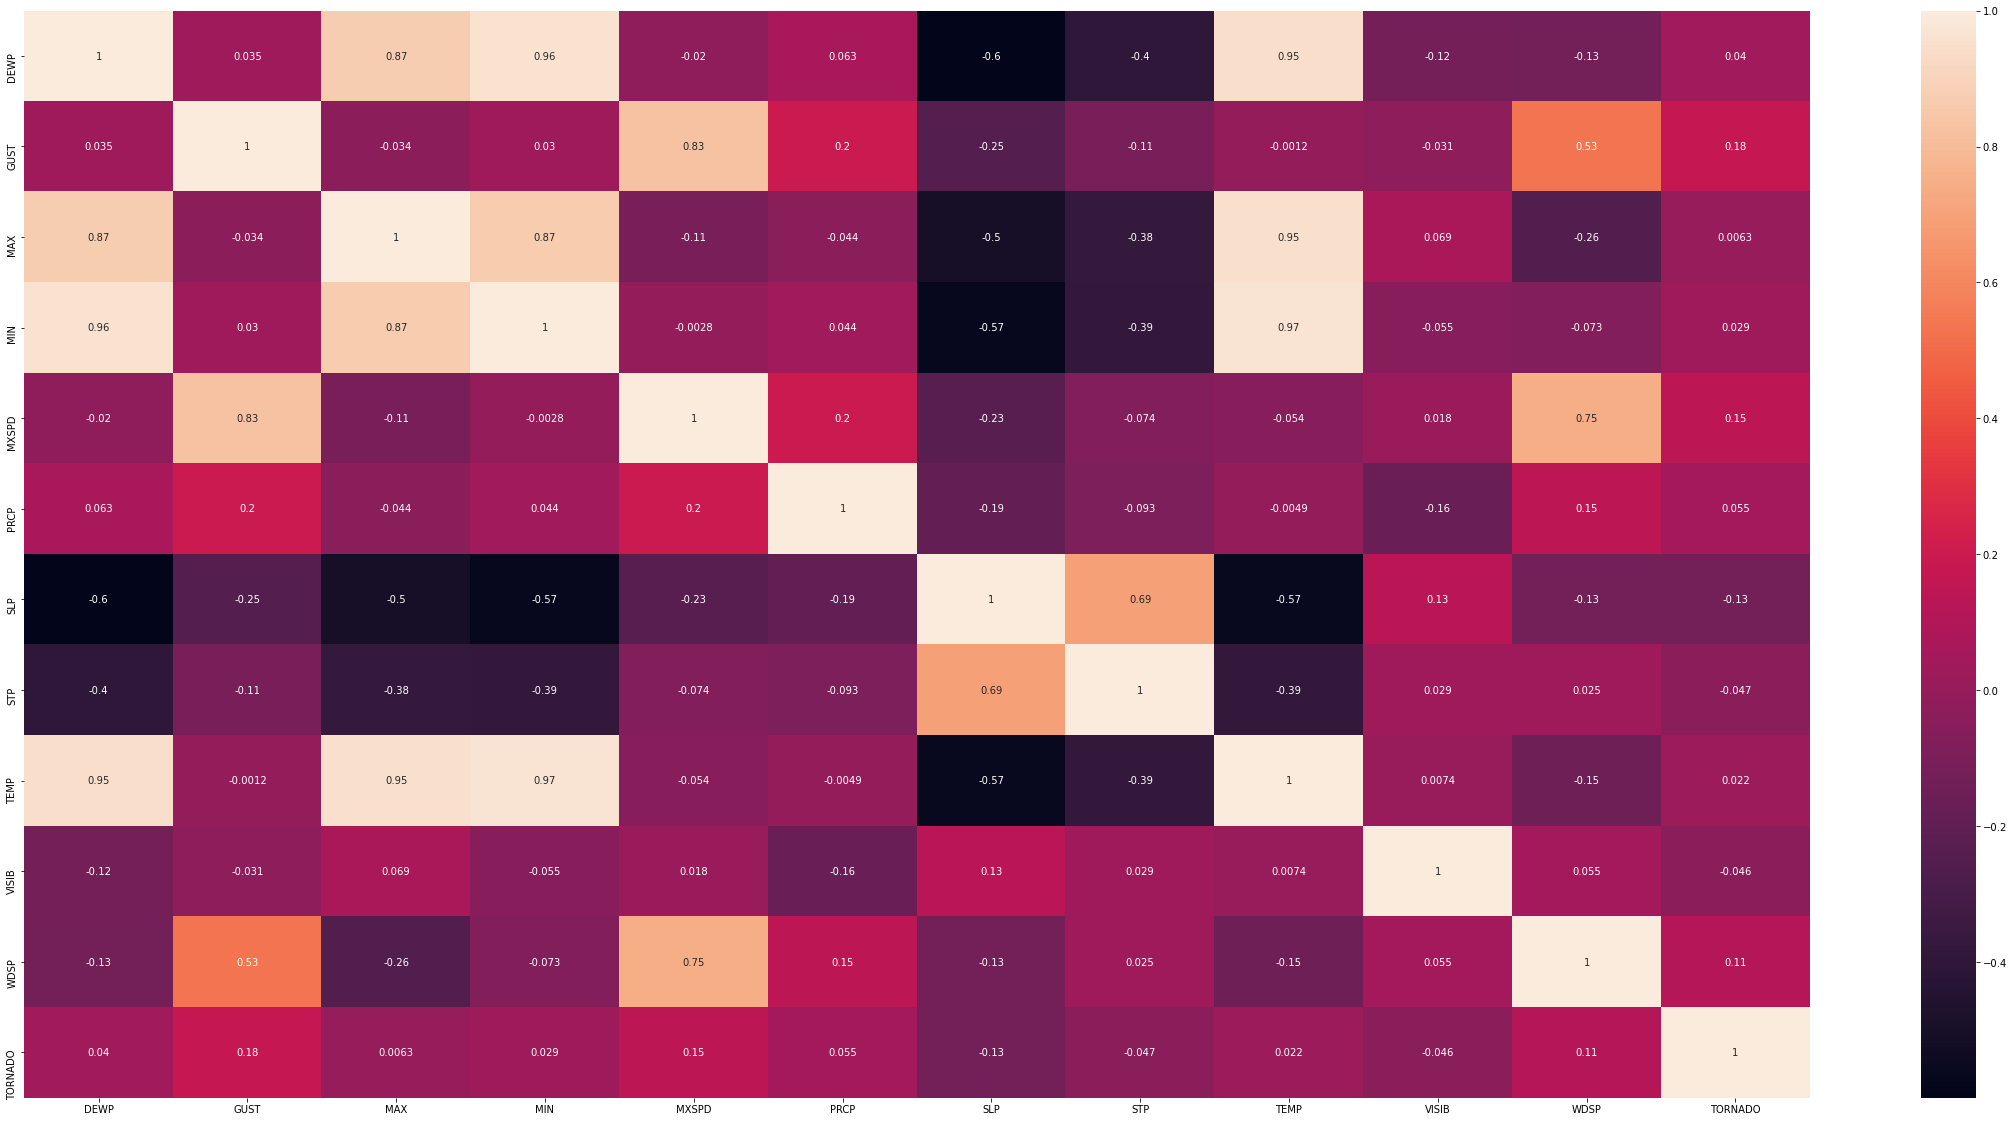

In [43]:
# plot heatmap for just the weather attributes to get a better look at potential correlations
plt.figure(figsize=(40,20))
sns.heatmap(weather_data.corr(), annot=True)
plt.show()

Some observations: temperature and dewpoint are very much all correlated, which makes sense since dewpoint uses temperature in its calculation. There's a moderately strong negative correlation between atmospheric pressure and elevation. Also, as seen earlier, the three wind and two pressure attributes are very strongly correlated. Looking at the target variable, there don't seem to be any strong correlations. 

In [44]:
# Biserial Correlations
columns = ['DEWP', 'GUST', 'MAX', 'MIN', 'MXSPD', 'PRCP', 'SLP', 'STP', 'TEMP', 'VISIB', 'WDSP']

for col in columns:
    tornado = np.array(tornado_data['TORNADO'].tolist())
    attribute = np.array(tornado_data[col].tolist())
    nas = np.logical_or(np.isnan(tornado), np.isnan(attribute))
    result = stats.pointbiserialr(tornado[~nas], attribute[~nas])
    print(result)

PointbiserialrResult(correlation=0.03977713759290791, pvalue=6.19670604027309e-37)
PointbiserialrResult(correlation=0.17950711875315395, pvalue=0.0)
PointbiserialrResult(correlation=0.006290031872920054, pvalue=0.03672155245506024)
PointbiserialrResult(correlation=0.029170187134148432, pvalue=3.3277597675854767e-22)
PointbiserialrResult(correlation=0.14674097684284104, pvalue=0.0)
PointbiserialrResult(correlation=0.05478172165457025, pvalue=7.860493727680108e-66)
PointbiserialrResult(correlation=-0.13082491793393414, pvalue=1.8188769859872379e-206)
PointbiserialrResult(correlation=-0.04737896028348193, pvalue=1.284995683418396e-41)
PointbiserialrResult(correlation=0.021821676740089148, pvalue=4.2048776986309085e-13)
PointbiserialrResult(correlation=-0.04568636733134432, pvalue=1.5208914771542007e-46)
PointbiserialrResult(correlation=0.11467780608323432, pvalue=4.211057036479982e-295)


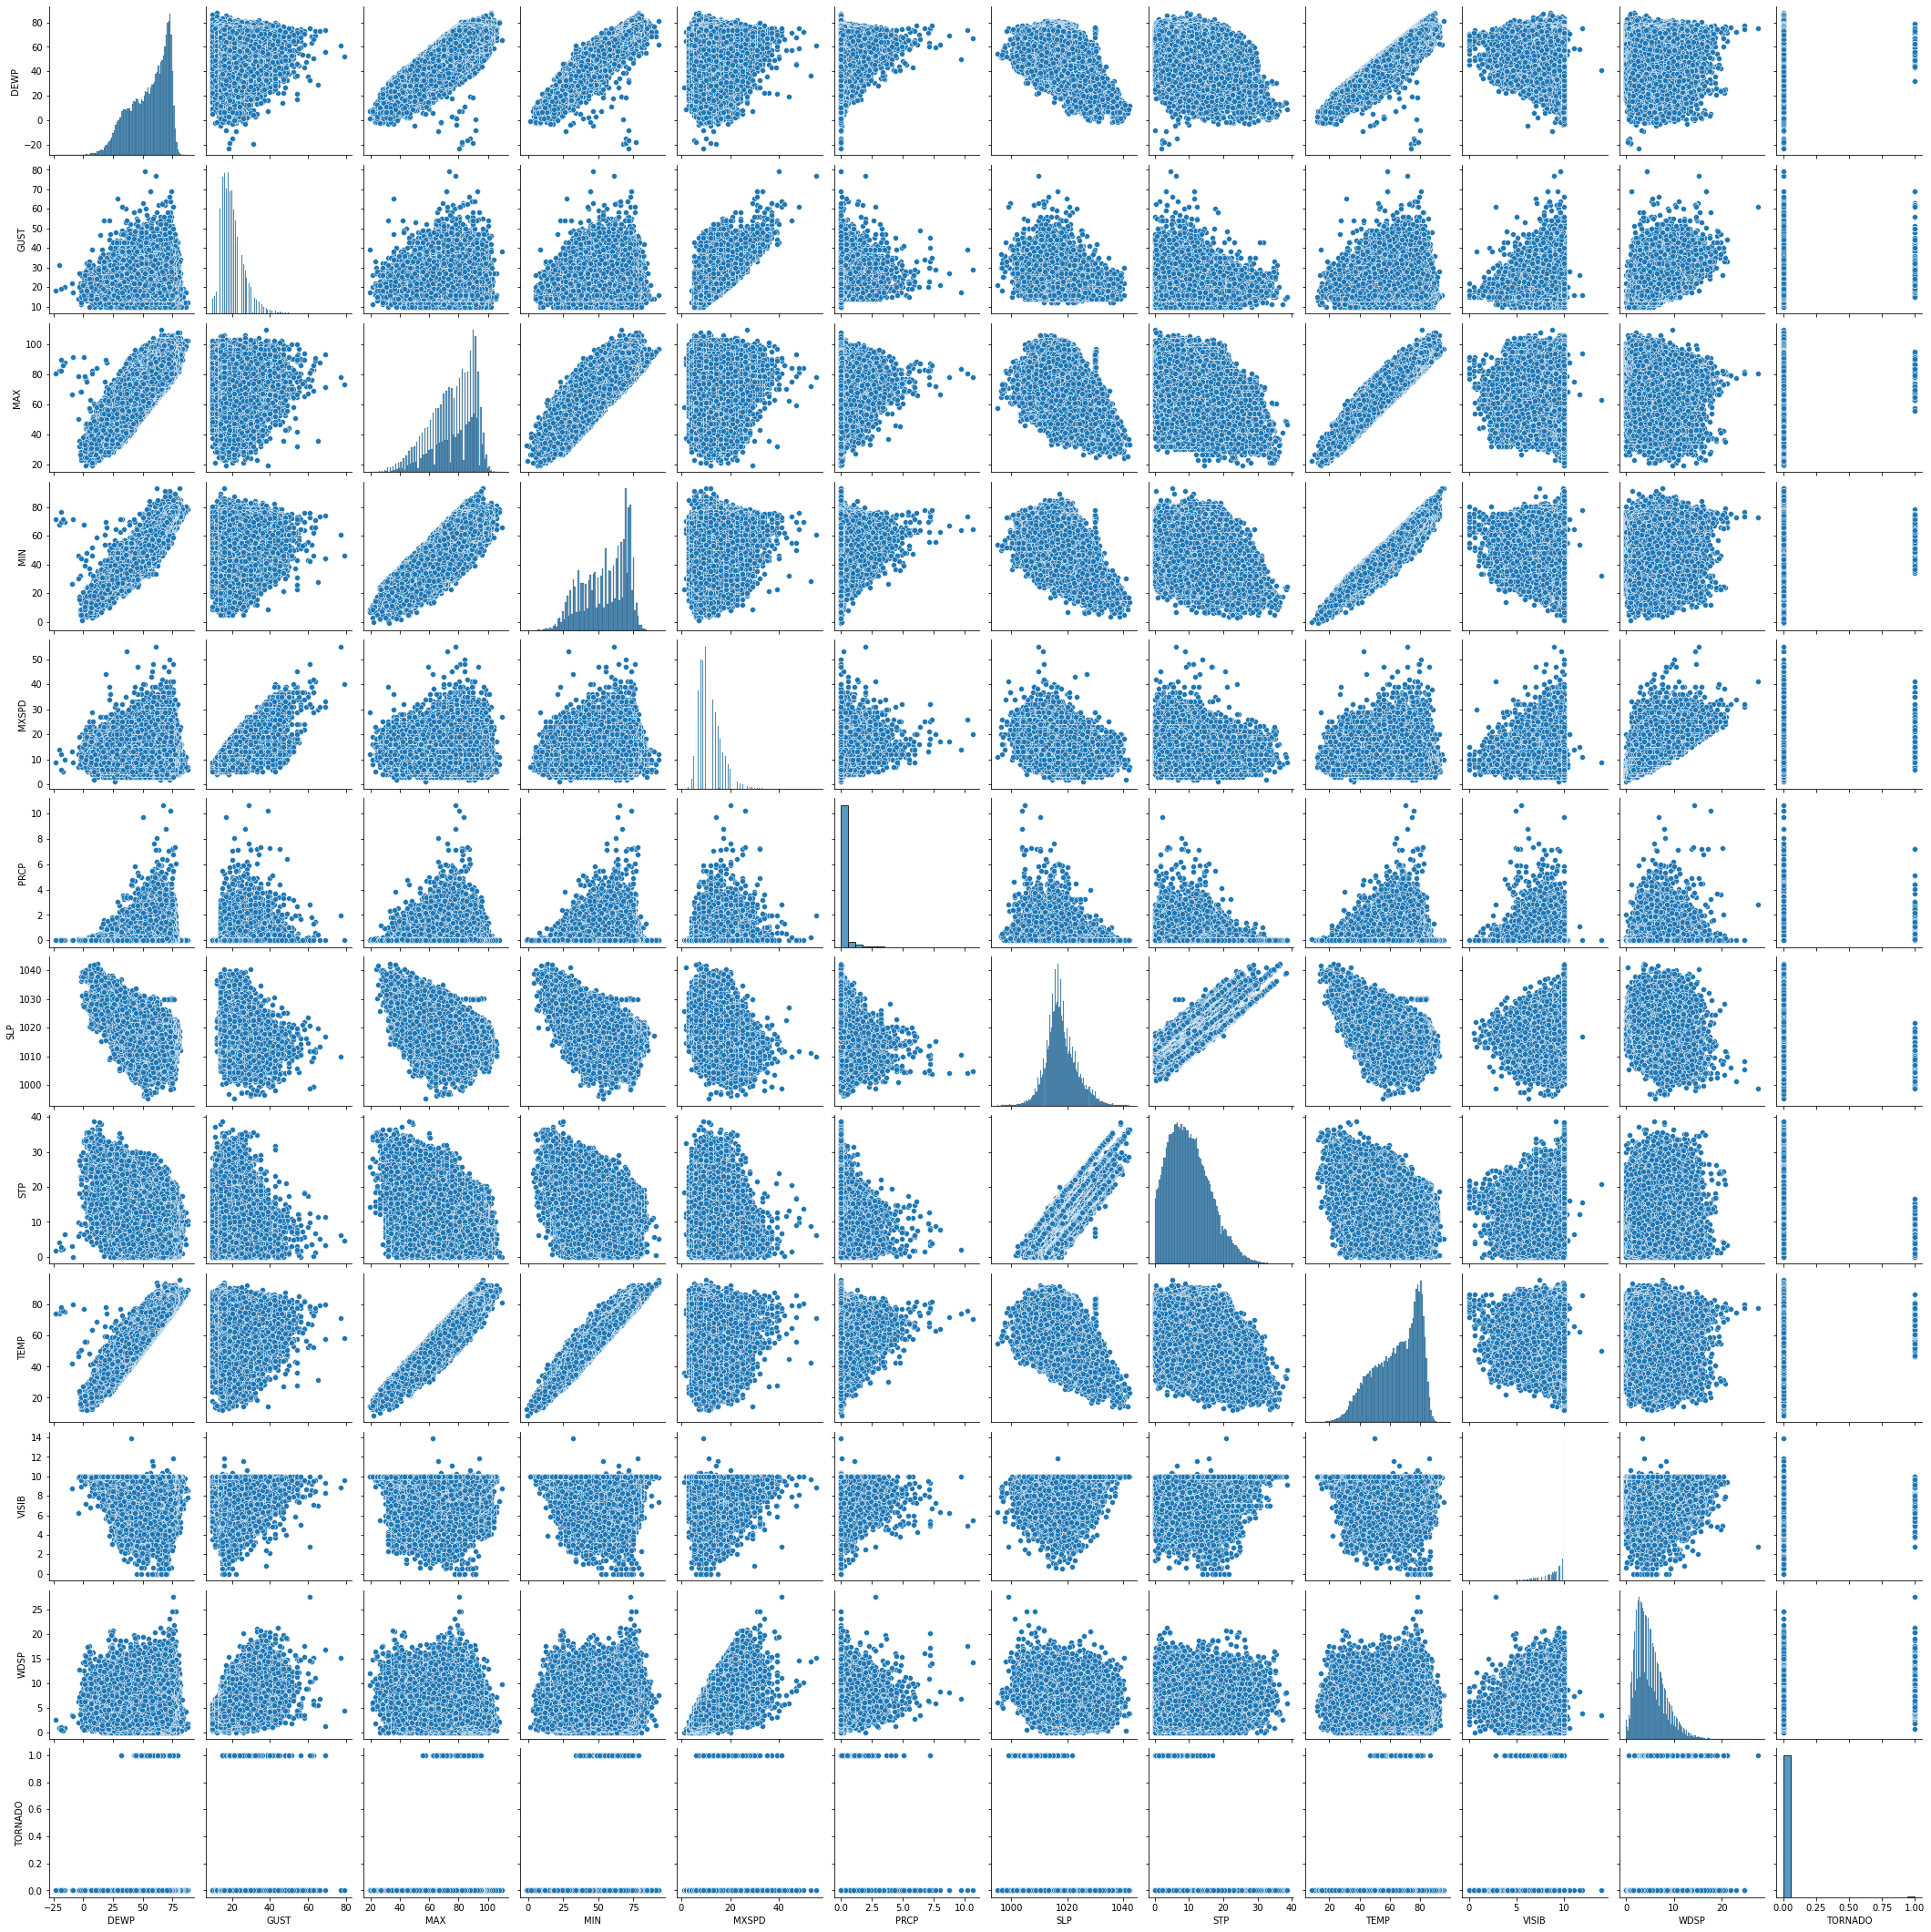

In [45]:
# look at scatter plots of all combinations of the weather data
sns.pairplot(weather_data)
plt.show()

This visualization is very helpful in getting a good sense of the weather patterns on days where tornadoes did occur. Just a quick glance reveals that the days where a tornado occurred have a high Dewpoint, high Temperature, low Standard atmospheric pressure, and relatively high visibility.

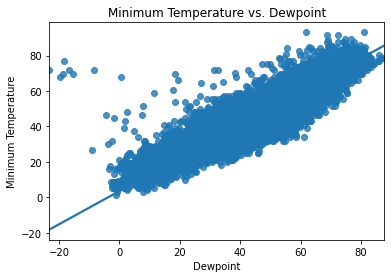

In [46]:
# plot dewpoint vs minimum temperature to get a closer look at the outliers
sns.regplot(x='DEWP', y='MIN', data=tornado_data)
plt.xlabel('Dewpoint')
plt.ylabel('Minimum Temperature')
plt.title('Minimum Temperature vs. Dewpoint')
plt.show()

Minimum temperature and dewpoint have a very strong correlation (0.96) and this can be seen in the above histogram. It's interesting to note the outlier values, where dewpoint is -20 and min temperature is about 70.

In [47]:
# see how many dewpoints values are negative
tornado_data.DEWP[tornado_data['DEWP'] < 0].count()

38

In [48]:
# look at the dewpoints with the lowest values and their associated minimum temperatures 
tornado_data.filter(['DEWP', 'MIN']).sort_values(by=['DEWP', 'MIN'], ascending=True).head(40)

DEWP   MIN
93779  -23.2  71.6
93775  -19.8  68.0
93776  -18.8  69.8
93778  -18.4  77.0
93777  -16.7  71.6
93774  -15.4  69.8
5472    -9.1  26.6
93780   -8.3  71.6
49209   -4.4  46.4
5474    -3.8  30.2
88969   -3.4  15.8
88951   -3.1  17.6
88952   -2.7   8.6
84991   -2.6   5.0
5473    -2.4  32.0
21975   -2.3   6.8
23000   -2.1   8.6
59995   -1.9  13.3
85339   -1.8   5.0
86404   -1.8   8.6
49210   -1.7  44.6
67709   -1.6   6.8
25551   -1.6   7.0
88974   -1.6   8.6
21613   -1.5   5.0
84995   -1.4  15.8
25573   -1.2   6.1
84996   -1.0   1.4
25919   -1.0   8.1
21630   -0.9   6.8
60000   -0.8   5.7
84974   -0.7   3.2
59978   -0.7   6.4
21634   -0.7  15.8
21635   -0.6   5.0
60345   -0.4   9.3
25572   -0.3  17.1
27010   -0.2   9.0
103770   0.0  21.0
11932    0.3  17.1

It looks like rows 93774-93780 have very low dewpoints and very high low temperatures. This is not a usual pattern, so let's look at these rows closer.

In [49]:
tornado_data.iloc[93772:93782]

STATION                           NAME  LATITUDE  LONGITUDE  \
93772  72076900275  GEORGE M BRYAN AIRPORT, MS US    33.433    -88.849   
93773  72076900275  GEORGE M BRYAN AIRPORT, MS US    33.433    -88.849   
93774  72076900275  GEORGE M BRYAN AIRPORT, MS US    33.433    -88.849   
93775  72076900275  GEORGE M BRYAN AIRPORT, MS US    33.433    -88.849   
93776  72076900275  GEORGE M BRYAN AIRPORT, MS US    33.433    -88.849   
93777  72076900275  GEORGE M BRYAN AIRPORT, MS US    33.433    -88.849   
93778  72076900275  GEORGE M BRYAN AIRPORT, MS US    33.433    -88.849   
93779  72076900275  GEORGE M BRYAN AIRPORT, MS US    33.433    -88.849   
93780  72076900275  GEORGE M BRYAN AIRPORT, MS US    33.433    -88.849   
93781  72076900275  GEORGE M BRYAN AIRPORT, MS US    33.433    -88.849   

       ELEVATION       DATE  DEWP  GUST   MAX   MIN  MXSPD  PRCP  SLP  STP  \
93772      101.2 2019-07-04  18.5   NaN  89.6  69.8    6.0   0.0  NaN  4.7   
93773      101.2 2019-07-05   0.5  15.9  91.4  68.0    8.9   0.0  NaN  6.6   
93774      101.2 2019-07-06 -15.4  20.0  87.8  69.8    9.9   0.0  NaN  6.5   
93775      101.2 2019-07-07 -19.8  31.1  82.4  68.0   14.0   0.0  NaN  4.1   
93776      101.2 2019-07-08 -18.8  19.0  89.6  69.8   12.0   0.0  NaN  2.1   
93777      101.2 2019-07-09 -16.7   NaN  86.0  71.6    5.1   0.0  NaN  2.2   
93778      101.2 2019-07-10 -18.4   NaN  82.4  77.0    6.0   0.0  NaN  2.8   
93779      101.2 2019-07-11 -23.2  18.1  80.6  71.6    8.9   0.0  NaN  1.9   
93780      101.2 2019-07-12  -8.3  17.1  91.4  71.6    8.9   0.0  NaN  0.0   
93781      101.2 2019-07-13  31.2  15.9  82.4  71.6   11.1   0.0  NaN  2.9   

       TEMP  VISIB  WDSP EVENT_ID CZ_NAME_STR BEGIN_DATE  BEGIN_TIME  TORNADO  \
93772  78.0    NaN   1.7      NaN         NaN        NaN         NaN        0   
93773  77.3    NaN   0.5      NaN         NaN        NaN         NaN        0   
93774  75.5    NaN   0.8      NaN         NaN        NaN         NaN        0   
93775  73.9    NaN   0.9      NaN         NaN        NaN         NaN        0   
93776  76.1    NaN   1.0      NaN         NaN        NaN         NaN        0   
93777  76.0    NaN   0.3      NaN         NaN        NaN         NaN        0   
93778  78.5    NaN   0.4      NaN         NaN        NaN         NaN        0   
93779  74.0    NaN   2.6      NaN         NaN        NaN         NaN        0   
93780  79.9    NaN   3.3      NaN         NaN        NaN         NaN        0   
93781  77.3    NaN   4.2      NaN         NaN        NaN         NaN        0   

      TOR_F_SCALE STATE_ABBR CZ_TIMEZONE EPISODE_ID CZ_TYPE CZ_FIPS  WFO  \
93772         NaN        NaN         NaN        NaN     NaN     NaN  NaN   
93773         NaN        NaN         NaN        NaN     NaN     NaN  NaN   
93774         NaN        NaN         NaN        NaN     NaN     NaN  NaN   
93775         NaN        NaN         NaN        NaN     NaN     NaN  NaN   
93776         NaN        NaN         NaN        NaN     NaN     NaN  NaN   
93777         NaN        NaN         NaN        NaN     NaN     NaN  NaN   
93778         NaN        NaN         NaN        NaN     NaN     NaN  NaN   
93779         NaN        NaN         NaN        NaN     NaN     NaN  NaN   
93780         NaN        NaN         NaN        NaN     NaN     NaN  NaN   
93781         NaN        NaN         NaN        NaN     NaN     NaN  NaN   

      SOURCE  TOR_LENGTH  TOR_WIDTH END_DATE  END_TIME  BEGIN_LAT  BEGIN_LON  \
93772    NaN         NaN        NaN      NaN       NaN        NaN        NaN   
93773    NaN         NaN        NaN      NaN       NaN        NaN        NaN   
93774    NaN         NaN        NaN      NaN       NaN        NaN        NaN   
93775    NaN         NaN        NaN      NaN       NaN        NaN        NaN   
93776    NaN         NaN        NaN      NaN       NaN        NaN        NaN   
93777    NaN         NaN        NaN      NaN       NaN        NaN        NaN   
93778    NaN         NaN        NaN      NaN    

After researching Dewpoint, which is calculated using air temperature and relative humidity, these negative values are possible (for example, a dewpoint of -23.2 and temperature of 71.6 would require a relative humidity of about 1.8). Although this is possible, it is most likely a result of an error in data recording, especially considering all of these values occur in succession in a week in July at the same station. Thus, I will remove these seven values being that the chance of these being accurate measurements is almost 0. 

In [50]:
# set these 7 values to np.nan
tornado_data.loc[93773:93781, 'DEWP'] = np.nan

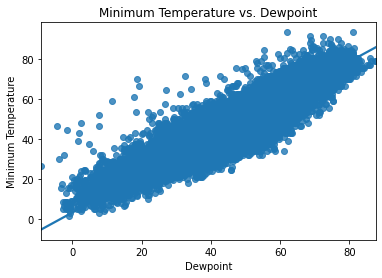

In [51]:
# plot the new Min vs DEWP plot without outliers
sns.regplot(x='DEWP', y='MIN', data=tornado_data)
plt.xlabel('Dewpoint')
plt.ylabel('Minimum Temperature')
plt.title('Minimum Temperature vs. Dewpoint')
plt.show()

This distribution looks much more evenly distributed.

Now let's look at boxplots of some of the above columns that showed discrepencies in whether or not a tornado occured on that day.

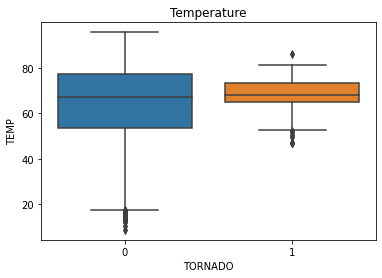

In [52]:
sns.boxplot(x='TORNADO', y='TEMP', data=tornado_data)
plt.title('Temperature')
plt.show()

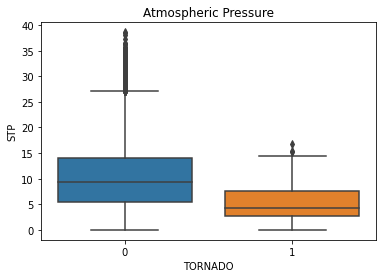

In [53]:
sns.boxplot(x='TORNADO', y='STP', data=tornado_data)
plt.title('Atmospheric Pressure')
plt.show()

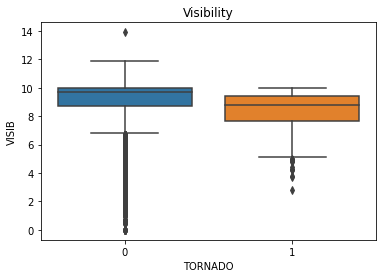

In [54]:
sns.boxplot(x='TORNADO', y='VISIB', data=tornado_data)
plt.title('Visibility')
plt.show()

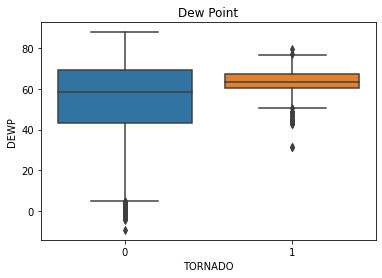

In [55]:
sns.boxplot(x='TORNADO', y='DEWP', data=tornado_data)
plt.title('Dew Point')
plt.show()

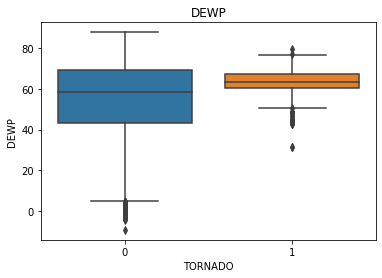

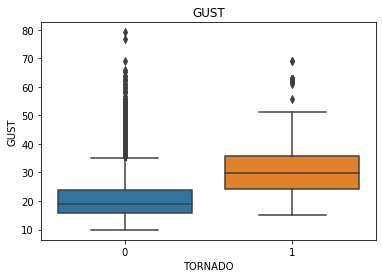

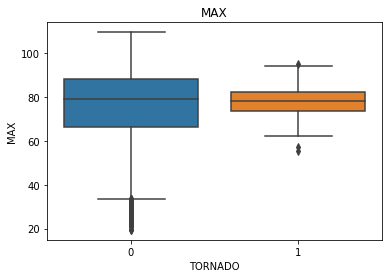

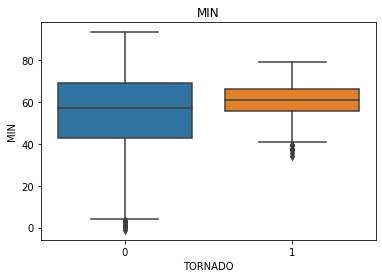

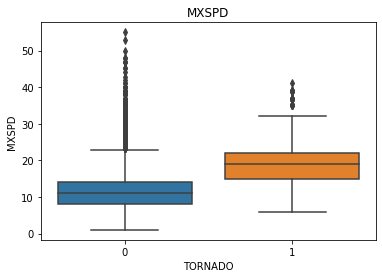

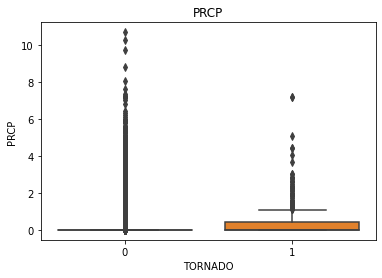

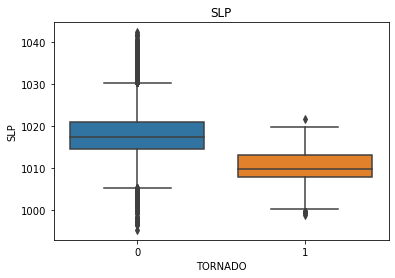

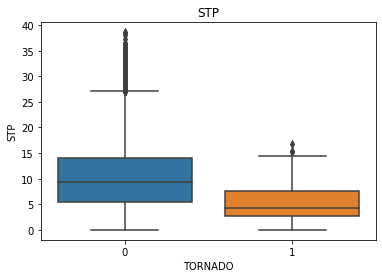

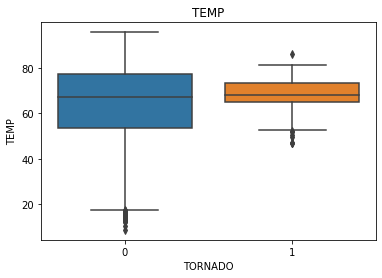

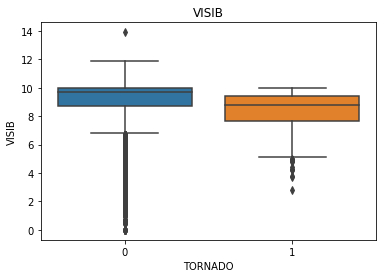

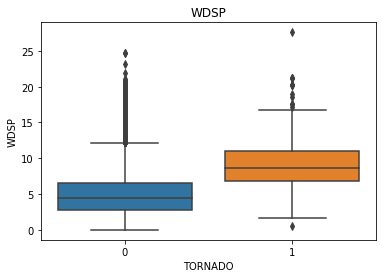

In [56]:
# plot all of the possible box plots
col = ['DEWP', 'GUST', 'MAX', 'MIN', 'MXSPD', 'PRCP', 'SLP', 'STP', 'TEMP', 'VISIB', 'WDSP']

for c in col:
    fig, ax = plt.subplots()
    sns.boxplot(x='TORNADO', y=c , data=tornado_data)
    plt.title(c)

In [57]:
for c in col:
    results = stats.mannwhitneyu(tornado_data[c].loc[tornado_data['TORNADO'] == 0], tornado_data[c].loc[tornado_data['TORNADO'] == 1])
    print(c, ':', results)

DEWP : MannwhitneyuResult(statistic=31815285.5, pvalue=1.8743986879283923e-28)
GUST : MannwhitneyuResult(statistic=38407156.0, pvalue=0.0002815415376315354)
MAX : MannwhitneyuResult(statistic=39365293.5, pvalue=0.00938231919820619)
MIN : MannwhitneyuResult(statistic=35472693.0, pvalue=4.833292698917021e-12)
MXSPD : MannwhitneyuResult(statistic=14489995.0, pvalue=2.435347171267712e-210)
PRCP : MannwhitneyuResult(statistic=28198694.0, pvalue=6.271357907060183e-75)
SLP : MannwhitneyuResult(statistic=22968340.5, pvalue=1.7141889261117056e-99)
STP : MannwhitneyuResult(statistic=39076879.0, pvalue=0.003676419451241903)
TEMP : MannwhitneyuResult(statistic=38550439.0, pvalue=0.0005122938328797967)
VISIB : MannwhitneyuResult(statistic=29048448.0, pvalue=2.707994834081946e-47)
WDSP : MannwhitneyuResult(statistic=17167472.0, pvalue=2.9774223267352674e-170)


Running the Mann-Whitney U test reveals that every feature is statistically significant.

# Other Observations

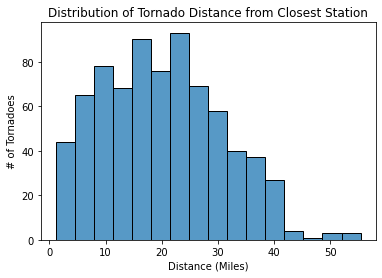

In [58]:
# plot the distribution of the distance of each tornado event from it's closest weather station
sns.histplot(data=tornado_data['DISTANCE_MILES'])
plt.xlabel('Distance (Miles)')
plt.ylabel('# of Tornadoes')
plt.title('Distribution of Tornado Distance from Closest Station')
plt.show()

In [59]:
# look at frequency of tornado strengths on F-scale
tornado_data['TOR_F_SCALE'].value_counts().sort_index()

EF0    207
EF1    387
EF2    109
EF3     35
EF4     15
EF5      3
Name: TOR_F_SCALE, dtype: int64

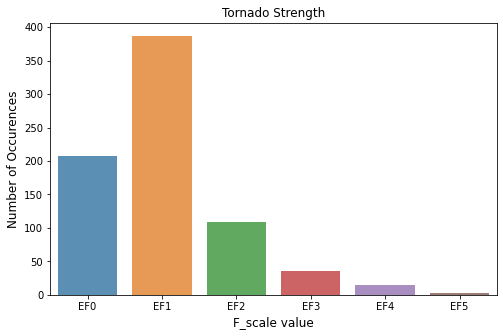

In [60]:
# create bar chart of the tornado f_scale value counts
f_scale = tornado_data['TOR_F_SCALE'].value_counts().sort_index()
plt.figure(figsize=(8,5))
sns.barplot(x=f_scale.index, y=f_scale.values, alpha=0.8)
plt.title('Tornado Strength')
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('F_scale value', fontsize=12)
plt.show()

The most common strength of storms is EF1, which is a storm with winds of 86-110 mph. As storm strength increases, the frequency of their occurrence decreases. The f_scale goes up to EF5.

# Downsizing Data

Let's now look to create a new data set, in which we include all of the rows with tornadoes, but only some of the non-tornado rows. There are 729 rows containing a tornado event, but there are only 186 rows with no missing data. I want there to be a 4:1 ratio between non-tornado and tornado data, so we can randomly select 744 rows from the non-tornado rows to remain in this new set of data.

In [61]:
l = [2,3,4,6,7,8,9,10,11,12,13,14,15,16,21,43,46]
tornado_numeric = tornado_data.iloc[:, l]

In [62]:
# get a sample of 744 rows that didn't have tornado events
sample = tornado_numeric.loc[tornado_numeric['TORNADO'] != 1].dropna().sample(n=744, random_state=100)

In [63]:
sample.shape

(744, 17)

In [64]:
# filter all rows with tornadoes
sample_t = tornado_numeric.loc[tornado_numeric['TORNADO'] == 1].dropna()

In [65]:
sample_t.shape

(186, 17)

In [66]:
# combine above two dataframes into 1
downsized = pd.concat([sample, sample_t], axis=0, ignore_index=True)

In [67]:
downsized.shape

(930, 17)

In [68]:
downsized.head()

LATITUDE  LONGITUDE  ELEVATION  DEWP  GUST   MAX   MIN  MXSPD  PRCP  \
0  30.46361  -88.53194        5.5  67.2  24.1  75.9  66.0   15.0  0.01   
1  32.33667  -90.22139      104.2  68.1  18.1  82.9  71.1   12.0  0.00   
2  30.41190  -89.08080       12.8  78.0  20.0  96.1  79.0   15.9  0.00   
3  33.65000  -88.45000       66.8  67.6  22.0  77.5  66.9   15.9  1.60   
4  34.26220  -88.77130      110.0  66.2  22.9  86.0  66.9   13.0  1.05   

      SLP   STP  TEMP  VISIB  WDSP  TORNADO  MONTH_4  MONTH_7  
0  1014.1  13.7  70.4    3.4  11.9        0        0        0  
1  1017.2   5.7  75.6    8.7   7.6        0        0        0  
2  1011.4  10.3  84.4    7.8   2.9        0        0        0  
3  1016.9   8.9  70.9    9.4   5.2        0        0        0  
4  1014.8   2.1  73.0    8.9   5.5        0        0        0

In [69]:
# rename month columns to April and July
downsized.rename(columns={'MONTH_4': 'APRIL', 'MONTH_7': 'JULY'}, inplace=True)

# Feature Importance

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [71]:
# create X and y variables
columns = downsized.columns
columns = columns.drop('TORNADO')

X = downsized[columns]
y = downsized['TORNADO']

In [72]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)

In [73]:
# instantiate RFC and fit model to training data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
rf.feature_importances_

array([0.02539472, 0.01720922, 0.03549933, 0.0734397 , 0.12188446,
       0.06579832, 0.04880225, 0.08812271, 0.02283536, 0.20329082,
       0.07598785, 0.06953263, 0.06874217, 0.07797746, 0.00489147,
       0.00059152])

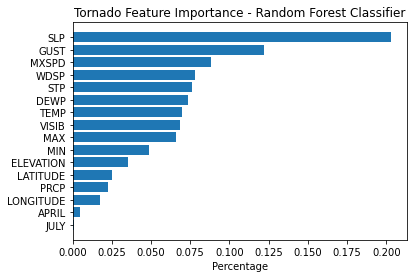

In [75]:
# sort the columns by importance
sorted_index = rf.feature_importances_.argsort()

# plot feature importance
plt.barh(columns[sorted_index], rf.feature_importances_[sorted_index])
plt.title('Tornado Feature Importance - Random Forest Classifier')
plt.xlabel('Percentage')
plt.show()

There's a lot to consider here. First, we are assuming that the 186 tornadoes without any missing data are a fairly evenly distributed sample of the 729 total. This must also be assumed with the non-tornado weather rows, but I chose a random sample of 744 from thousands of rows, so there is more randomness in this sample. As for the graph above, SLP (Sea Level Pressure) is the most important feature, and GUST is the second. This is interesting because these were the two columns that we considered dropping since they had so many missing values. Perhaps there is some reporting bias in these two features, but we will assume that the data was collected on a randomly sparse basis.

# Regression Analysis of Feature Importance

Now I'll use VIF scores and RobustScaler to perform another method of feature importance

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [77]:
from sklearn.preprocessing import RobustScaler

In [78]:
# drop colinear features for Logit model
X_reg = add_constant(downsized).drop(['STP','MIN','MAX','MXSPD','DEWP','TORNADO'], axis=1)
pd.Series([variance_inflation_factor(X_reg.values, i) for i in range(X_reg.shape[1])], index=X_reg.columns)

const        82553.971266
LATITUDE         1.311797
LONGITUDE        1.106338
ELEVATION        1.358281
GUST             1.599849
PRCP             1.197829
SLP              1.838772
TEMP             1.683925
VISIB            1.217225
WDSP             1.642251
APRIL            1.131396
JULY             1.112133
dtype: float64

In [79]:
import statsmodels.api as sm 

# Logit model with non-normalized features
model = sm.Logit(y, X_reg, index_col=0)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.277257
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                TORNADO   No. Observations:                  930
Model:                          Logit   Df Residuals:                      918
Method:                           MLE   Df Model:                           11
Date:                Tue, 06 Apr 2021   Pseudo R-squ.:                  0.4459
Time:                        09:52:25   Log-Likelihood:                -257.85
converged:                       True   LL-Null:                       -465.37
Covariance Type:            nonrobust   LLR p-value:                 3.894e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        331.4693     41.236      8.038      0.000     250.649     412.290
LATITUDE      -0.3715      0.117     -3.177      0.001      -0.601      -0.142
LONGITUDE      0.0417      0.151      0.275      0.783      -0.255       0.338
ELEVATION      0.0092      0.004      2.335      0.020       0.001       0.017
GUST           0.1160      0.019      6.175      0.000       0.079       0.153
PRCP          -0.0512      0.180     -0.285      0.776      -0.404       0.301
SLP           -0.3134      0.038     -8.355      0.000      -0.387      -0.240
TEMP          -0.0187      0.012     -1.501      0.133      -0.043       0.006
VISIB         -0.3027      0.092     -3.278      0.001      -0.484      -0.122
WDSP           0.1671      0.045      3.716      0.000       0.079       0.255
APRIL          0.4510      0.290      1.555      0.120      -0.118       1.020
JULY          -1.5013      1.052     -1.427      0.154      -3.564       0.561
==============================================================================
"""

This shows the Logit results for the non-normalized data. The only difference are in the coeficient, standard error, and confidence interval, as well as all results for the constant.

In [80]:
# perfom RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
dataset = pd.DataFrame(X, columns=columns)
dataset.describe()

LATITUDE   LONGITUDE   ELEVATION        DEWP        GUST         MAX  \
count  930.000000  930.000000  930.000000  930.000000  930.000000  930.000000   
mean    -0.042051   -0.142805   -0.048956   -0.206073    0.262341   -0.103182   
std      0.546260    0.578313    0.585558    0.742932    0.881519    0.769082   
min     -0.873778   -1.387695   -0.995130   -3.030151   -1.011236   -2.982456   
25%     -0.478405   -0.569727   -0.451299   -0.623116   -0.325843   -0.526316   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.521595    0.430273    0.548701    0.376884    0.674157    0.473684   
max      0.875913    0.548893    0.959416    0.874372    4.606742    1.345029   

              MIN       MXSPD        PRCP         SLP         STP        TEMP  \
count  930.000000  930.000000  930.000000  930.000000  930.000000  930.000000   
mean    -0.144260    0.264886    1.240687    0.095323    0.114450   -0.126718   
std      0.645600    0.891131    3.103752    0.872399    0.684564    0.715134   
min     -2.256757   -1.311475    0.000000   -2.316667   -0.888889   -2.615804   
25%     -0.594595   -0.327869    0.000000   -0.433333   -0.430199   -0.559946   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.405405    0.672131    1.000000    0.566667    0.569801    0.440054   
max      0.900901    4.098361   33.057471    4.033333    2.985755    1.062670   

            VISIB        WDSP       APRIL        JULY  
count  930.000000  930.000000  930.000000  930.000000  
mean    -0.383154    0.132016    0.146237    0.052688  
std      0.963737    0.773467    0.353533    0.223530  
min     -7.083333   -1.350000    0.000000    0.000000  
25%     -0.666667   -0.425000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      0.333333    0.575000    0.000000    0.000000  
max      0.333333    3.725000    1.000000    1.000000

In [81]:
# drop colinear features for Logit model
X = add_constant(dataset).drop(['STP', 'DEWP', 'MIN', 'MAX', 'MXSPD'], axis=1)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

const        1.779551
LATITUDE     1.311797
LONGITUDE    1.106338
ELEVATION    1.358281
GUST         1.599849
PRCP         1.197829
SLP          1.838772
TEMP         1.683925
VISIB        1.217225
WDSP         1.642251
APRIL        1.131396
JULY         1.112133
dtype: float64

From Alexander on StackOverflow https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python

In [82]:
import statsmodels.api as sm 

# Logit model with normalized features
model = sm.Logit(y, X, index_col=0)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.277257
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                TORNADO   No. Observations:                  930
Model:                          Logit   Df Residuals:                      918
Method:                           MLE   Df Model:                           11
Date:                Tue, 06 Apr 2021   Pseudo R-squ.:                  0.4459
Time:                        09:52:25   Log-Likelihood:                -257.85
converged:                       True   LL-Null:                       -465.37
Covariance Type:            nonrobust   LLR p-value:                 3.894e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7288      0.192    -14.190      0.000      -3.106      -2.352
LATITUDE      -0.8176      0.257     -3.177      0.001      -1.322      -0.313
LONGITUDE      0.0609      0.222      0.275      0.783      -0.373       0.495
ELEVATION      0.5681      0.243      2.335      0.020       0.091       1.045
GUST           1.0328      0.167      6.175      0.000       0.705       1.361
PRCP          -0.0111      0.039     -0.285      0.776      -0.088       0.066
SLP           -1.8802      0.225     -8.355      0.000      -2.321      -1.439
TEMP          -0.3430      0.228     -1.501      0.133      -0.791       0.105
VISIB         -0.3632      0.111     -3.278      0.001      -0.580      -0.146
WDSP           0.6685      0.180      3.716      0.000       0.316       1.021
APRIL          0.4510      0.290      1.555      0.120      -0.118       1.020
JULY          -1.5013      1.052     -1.427      0.154      -3.564       0.561
==============================================================================
"""

# Analyzing Downsized Data

Let's look at some scatter plots of the features, color-coded based on whether or not a tornado occurred.

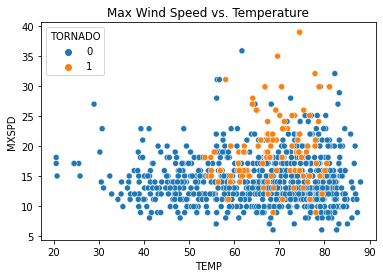

In [83]:
# scatter plot of MXSPD and TEMP sorted by Tornado occurrence
sns.scatterplot(x=downsized['TEMP'], y=downsized['MXSPD'], hue=downsized['TORNADO'])
plt.title('Max Wind Speed vs. Temperature')
plt.show()

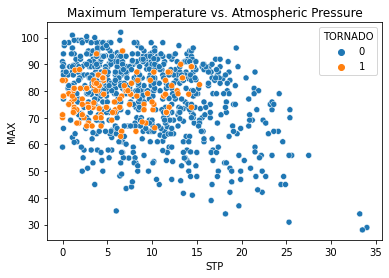

In [84]:
# scatter plot of STP and MAX sorted by Tornado occurrence
sns.scatterplot(x=downsized['STP'], y=downsized['MAX'], hue=downsized['TORNADO'])
plt.title('Maximum Temperature vs. Atmospheric Pressure')
plt.show()

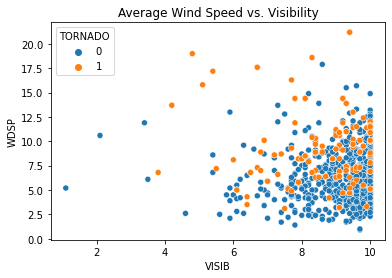

In [85]:
# scatter plot of VISIB and WDSP sorted by Tornado occurrence
sns.scatterplot(x=downsized['VISIB'], y=downsized['WDSP'], hue=downsized['TORNADO'])
plt.title('Average Wind Speed vs. Visibility')
plt.show()

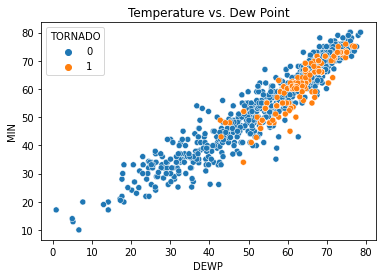

In [86]:
# scatter plot of DEWP and MIN sorted by Tornado occurrence
sns.scatterplot(x=downsized['DEWP'], y=downsized['MIN'], hue=downsized['TORNADO'])
plt.title('Temperature vs. Dew Point')
plt.show()

Just picking out a few feature pairs, it is apparent that there is some significance in whether or not a tornado occurred. The Tempereature vs. Dew Point example directly above shows this well. There were no tornadoes with a DEWP below 40 or MIN temperature below 30. I could look at each combination and analyze the discrepancies but this wouldn't be super valuable or productive. It is simply good to know that on the days where a tornado is occurring, the meteorological data is reflecting this change.

In [87]:
downsized.to_csv('/Users/gregoryolson/Documents/Data Science CT/Capstone/Capstone_Tornado/Data/tornado_downsized.csv', index=False)